# Laboratorium 3 - MOFIT

## Równanie falowe dla struny


### Krzysztof Tondera

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set()

## Zad1 - Sztywne Warunki

In [60]:
#Warunki początkowe
def fun_u0(x):
    return np.exp(-100*(x-0.5)**2)
v0=0

c=1
dx=0.01
dt=0.005
N=101
t=np.arange(0,5,dt)
x=np.arange(0,1,dx)
len(t)

1000

In [61]:
def sztywne(x,t,dx,dt):
    v=np.zeros((len(x),len(t)))
    u=np.zeros((len(x),len(t)))
    a=np.zeros((len(x),len(t)))
    
    for i in range(len(x)):
        u[i,0]=fun_u0(i*dx)
        
    
    for j in range(1,len(t)):
        for i in range(1,len(x)-1):
            u[i,j]=u[i,j-1]+dt*v[i,j-1]+0.5*a[i,j-1]*dt**2
        for i in range(1,len(x)-1):
            a[i,j]=(u[i+1,j]+u[i-1,j]-2*u[i,j])/dx**2
        for i in range(1,len(x)-1):
            v[i,j]=v[i,j-1]+0.5*dt*(a[i,j]+a[i,j-1])
            
    return u,v

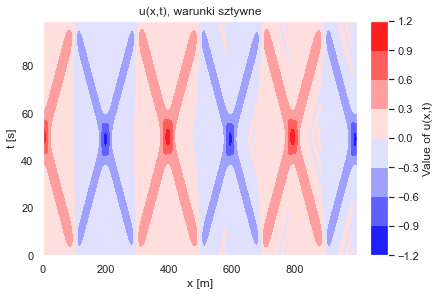

In [62]:
u1,v1=sztywne(x,t,dx,dt)
#sns.heatmap(u1,cmap="coolwarm")

fig, ax = plt.subplots(constrained_layout=True)
cs = ax.contourf(u1,cmap="bwr")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Value of u(x,t)')

plt.title("u(x,t), warunki sztywne")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.show()

# Zad2 - Luźne Warunki

In [63]:
def luzne(x,t,dx,dt):
    v=np.zeros((len(x),len(t)))
    u=np.zeros((len(x),len(t)))
    a=np.zeros((len(x),len(t)))
    
    for i in range(len(x)):
        u[i,0]=fun_u0(i*dx)
    
    for j in range(1,len(t)):
        for i in range(1,len(x)-1):
            u[i,j]=u[i,j-1]+dt*v[i,j-1]+0.5*a[i,j-1]*dt**2
        u[0,j]=u[1,j]
        u[99,j]=u[98,j]
        for i in range(1,len(x)-1):
            a[i,j]=(u[i+1,j]+u[i-1,j]-2*u[i,j])/dx**2
        for i in range(1,len(x)-1):
            v[i,j]=v[i,j-1]+0.5*dt*(a[i,j]+a[i,j-1])
            
    return u,v

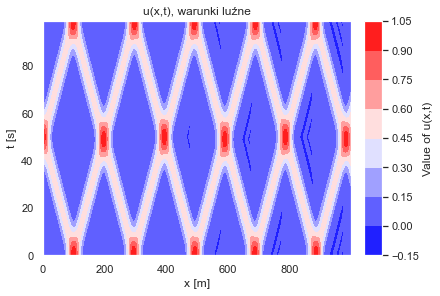

In [64]:
u1,v1=luzne(x,t,dx,dt)
fig, ax = plt.subplots(constrained_layout=True)
cs = ax.contourf(u1,cmap="bwr")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Value of u(x,t)')

plt.title("u(x,t), warunki luźne")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.show()

## Zad3 - drgania tłumione

In [65]:
def sztywne_damp(x,t,dx,dt,beta):
    v=np.zeros((len(x),len(t)))
    u=np.zeros((len(x),len(t)))
    a=np.zeros((len(x),len(t)))
    
    def a_b(u_tab,i,j,v):
        return a_fun(u_tab,i,j,v)-2*beta*v
    
    def a_fun(u_tab,i,j,v):
        if i>0 and i<len(x)-1:
            return (u_tab[i+1][j]+u_tab[i-1][j]-2*u_tab[i][j])/dx**2
        else:
            return 0
    
    for i in range(len(x)):
        u[i,0]=fun_u0(i*dx)
       
    
    for j in range(1,len(t)):
        for i in range(1,len(x)-1):
            u[i,j]=u[i,j-1]+dt*v[i,j-1]+0.5*a[i,j-1]*dt**2
            
        for i in range(1,len(x)-1):
            a[i,j]=(u[i+1,j]+u[i-1,j]-2*u[i,j])/dx**2
            
        for i in range(1,len(x)-1):
            v[i,j]=(v[i,j-1]+0.5*dt*(a[i,j]+a_b(u,i,j-1,v[i][j-1])))/(1+beta*dt)
            
            
    return u,v

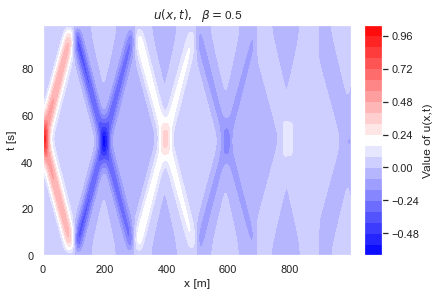

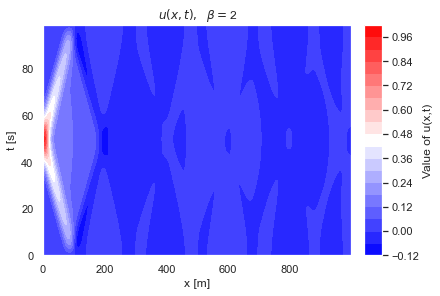

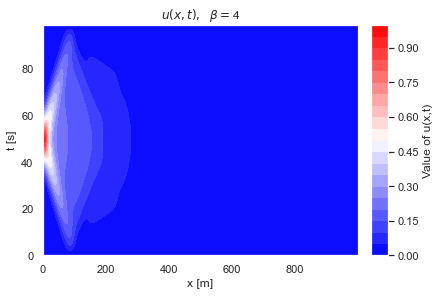

In [66]:
beta_tab=[0.5,2,4]

u_tab=[]
for i in beta_tab:
    u0,v0=sztywne_damp(x,t,dx,dt,i)
    fig, ax = plt.subplots(constrained_layout=True)
    cs = ax.contourf(u0,cmap="bwr",levels=20)
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel('Value of u(x,t)')
    plt.xlabel("x [m]")
    plt.ylabel("t [s]")

    plt.title(r"$u(x,t),\ \ \beta=${}".format(i))
    plt.show()
    

## Zad4 - Drgania wymuszone

In [67]:
def sztywne_forced(x,t,dx,dt,beta,x0,w):
    v=np.zeros((len(x),len(t)))
    u=np.zeros((len(x),len(t)))
    a=np.zeros((len(x),len(t)))
            
    def a_f(i,j):
        if(dx*i==x0):
            return np.cos(w*(j*dt))
        else:
            return 0
        
    def a_fun(u_tab,i,j,v):
        if i>0 and i<len(x)-1:
            return (u_tab[i+1][j]+u_tab[i-1][j]-2*u_tab[i][j])/dx**2
        else:
            return 0
    
    def a_b(u_tab,i,j,v):
        return a_fun(u_tab,i,j,v)-2*beta*v
        
    
    for j in range(1,len(t)-1):
        for i in range(1,len(x)-1):
            a[i][j]=a_fun(u,i,j-1,v[i][j-1])
                 
        for i in range(1,len(x)-1):
            u[i][j]=u[i][j-1]+dt*v[i][j-1]+dt**2/2*a[i][j]
            
        for i in range(1,len(x)-1):
            v[i][j]=(v[i][j-1]+0.5*dt*(a[i][j]+a_b(u,i,j,v[i][j-1])+a_f(i,j)+a_f(i,j+1)))/(1+beta*dt)
                    
    return u,v

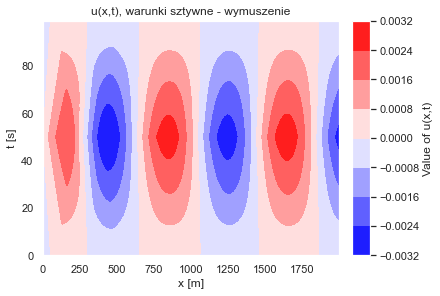

In [68]:
t=np.arange(0,10,dt)

u0,v0=sztywne_forced(x,t,dx,dt,1,0.5,np.pi/2)
fig, ax = plt.subplots(constrained_layout=True)
cs = ax.contourf(u0,cmap="bwr")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Value of u(x,t)')

plt.title("u(x,t), warunki sztywne - wymuszenie")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.show()

## Zad 5 - rezonanse

In [50]:
def rezonanse(x,t,dx,dt,beta,x0,w,t1,t2):
    v=np.zeros((len(x),len(t)))
    u=np.zeros((len(x),len(t)))
    a=np.zeros((len(x),len(t)))
    
    def a_f(i,j):
        if(i==40):
            return np.cos(w*(j*dt))
        else:
            return 0
        
    def a_fun(u_tab,i,j,v):
        if i>0 and i<len(x)-1:
            return (u_tab[i+1][j]+u_tab[i-1][j]-2*u_tab[i][j])/dx**2
        else:
            return 0
    
    def a_b(u_tab,i,j,v):
        return a_fun(u_tab,i,j,v)-2*beta*v
        
    
    for i in range(len(x)):
        u[0][i]=0
    
    E=0
    
    for j in range(len(t)):
    #for j in range(200):
        du=[]
        
        for i in range(1,len(x)-1):
            a[i][j]=a_fun(u,i,j-1,v[i][j-1])
        
        for i in range(1,len(x)-1):
            u[i][j]=u[i][j-1]+dt*v[i][j-1]+dt**2/2*a[i][j]
        
        for i in range(len(x)-1):
            if t2>j*dt>t1:
                E+=(u[i][j]-u[i-1][j])**2
        
    
        
        for i in range(1,len(x)-1):
            v[i][j]=(v[i][j-1]+0.5*dt*(a[i][j]+a_b(u,i,j,v[i][j-1])+a_f(i,j)+a_f(i,j+1)))/(1+beta*dt)
                     
            if t2>j*dt and j*dt>t1:
                E+=(v[i][j]**2)*dx
        
        #if t2>j*dt>t1:
            #E+=sum(du)
                
    return (E*0.5)/(t2-t1)
    #return u

In [53]:
t1=16
t2=20
dx=0.01
dt=0.005

t=np.arange(0,t2,dt)
w_tab=np.linspace(0,10*np.pi,100)

energy=[]
for i in w_tab:
    energy.append(rezonanse(x,t,dx,dt,1,0.4,i,t1,t2))

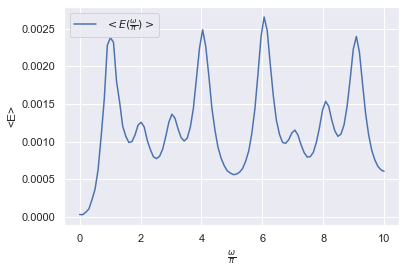

In [57]:
plt.plot(w_tab/np.pi,energy,label=r"$<E(\frac{\omega}{\pi})>$")
plt.xlabel(r"$\frac{\omega}{\pi}$")
plt.ylabel("<E>")
plt.legend()
plt.grid(True)
plt.show()